<a href="https://colab.research.google.com/github/rizkyprofs/ML_DL/blob/main/utsDL_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Implementasi MLP untuk Regresi menggunakan TensorFlow
implementasi end-to-end pipeline untuk model regresi menggunakan arsitektur Multi-Layer Perceptron (MLP) dengan TensorFlow. Kita akan menggunakan dataset miniRegresiUTS.csv.
##Import Library yang Diperlukan
Pertama, kita akan mengimpor semua library yang dibutuhkan untuk analisis data, preprocessing, visualisasi, dan pembangunan model.

In [3]:
# Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.regularizers import l1, l2
import os
import warnings
warnings.filterwarnings('ignore')

# Set random seed untuk reproducibility
np.random.seed(42)
tf.random.set_seed(42)

##1. Pengumpulan & Pembersihan Data
Kita akan memuat dataset dan melakukan exploratory data analysis (EDA) untuk memahami karakteristiknya.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Preview 5 data pertama:


2001  49.94357  21.47114   73.0775   8.74861  -17.40628  -13.09905  \
0  2001  48.73215  18.42930  70.32679  12.94636  -10.32437  -24.83777   
1  2001  50.95714  31.85602  55.81851  13.41693   -6.57898  -18.54940   
2  2001  48.24750  -1.89837  36.29772   2.58776    0.97170  -26.21683   
3  2001  50.97020  42.20998  67.09964   8.46791  -15.85279  -16.81409   
4  2001  50.54767   0.31568  92.35066  22.38696  -25.51870  -19.04928   

   -25.01202  -12.23257   7.83089  ...   13.0162  -54.40548  58.99367  \
0    8.76630   -0.92019  18.76548  ...   5.66812  -19.68073  33.04964   
1   -3.27872   -2.35035  16.07017  ...   3.03800   26.05866 -50.92779   
2    5.05097  -10.34124   3.55005  ...  34.57337 -171.70734 -16.96705   
3  -12.48207   -9.37636  12.63699  ...   9.92661  -55.95724  64.92712   
4   20.67345   -5.19943   3.63566  ...   6.59753  -50.69577  26.02574   

   15.37344   1.11144  -23.08793   68.40795  -1.82223  -27.46348   2.26327  
0  42.87836  -9.90378  -32.22788   70.49388  12.04941   58.43453  26.92061  
1  10.93792  -0.07568   43.20130 -115.00698  -0.05859   39.67068  -0.66345  
2 -46.67617 -12.51516   82.58061  -72.08993   9.90558  199.62971  18.85382  
3 -17.72522  -1.49237   -7.50035   51.76631   7.88713   55.66926  28.74903  
4  18.94430  -0.33730    6.09352   35.18381   5.00283  -11.02257   0.02263  

[5 rows x 91 columns]

Preview 5 data pertama:


2001  49.94357  21.47114   73.0775   8.74861  -17.40628  -13.09905  \
0  2001  48.73215  18.42930  70.32679  12.94636  -10.32437  -24.83777   
1  2001  50.95714  31.85602  55.81851  13.41693   -6.57898  -18.54940   
2  2001  48.24750  -1.89837  36.29772   2.58776    0.97170  -26.21683   
3  2001  50.97020  42.20998  67.09964   8.46791  -15.85279  -16.81409   
4  2001  50.54767   0.31568  92.35066  22.38696  -25.51870  -19.04928   

   -25.01202  -12.23257   7.83089  ...   13.0162  -54.40548  58.99367  \
0    8.76630   -0.92019  18.76548  ...   5.66812  -19.68073  33.04964   
1   -3.27872   -2.35035  16.07017  ...   3.03800   26.05866 -50.92779   
2    5.05097  -10.34124   3.55005  ...  34.57337 -171.70734 -16.96705   
3  -12.48207   -9.37636  12.63699  ...   9.92661  -55.95724  64.92712   
4   20.67345   -5.19943   3.63566  ...   6.59753  -50.69577  26.02574   

   15.37344   1.11144  -23.08793   68.40795  -1.82223  -27.46348   2.26327  
0  42.87836  -9.90378  -32.22788   70.49388  12.04941   58.43453  26.92061  
1  10.93792  -0.07568   43.20130 -115.00698  -0.05859   39.67068  -0.66345  
2 -46.67617 -12.51516   82.58061  -72.08993   9.90558  199.62971  18.85382  
3 -17.72522  -1.49237   -7.50035   51.76631   7.88713   55.66926  28.74903  
4  18.94430  -0.33730    6.09352   35.18381   5.00283  -11.02257   0.02263  

[5 rows x 91 columns]


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515344 entries, 0 to 515343
Data columns (total 91 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   2001        515344 non-null  int64  
 1   49.94357    515344 non-null  float64
 2   21.47114    515344 non-null  float64
 3   73.0775     515344 non-null  float64
 4   8.74861     515344 non-null  float64
 5   -17.40628   515344 non-null  float64
 6   -13.09905   515344 non-null  float64
 7   -25.01202   515344 non-null  float64
 8   -12.23257   515344 non-null  float64
 9   7.83089     515344 non-null  float64
 10  -2.46783    515344 non-null  float64
 11  3.32136     515344 non-null  float64
 12  -2.31521    515344 non-null  float64
 13  10.20556    515344 non-null  float64
 14  611.10913   515344 non-null  float64
 15  951.0896    515344 non-null  float64
 16  698.11428   515344 non-null  float64
 17  408.98485   515344 non-null  float64
 18  383.70912   515344 non-n

None


Statistik Deskriptif:


2001       49.94357       21.47114        73.0775  \
count  515344.000000  515344.000000  515344.000000  515344.000000   
mean     1998.397077      43.387113       1.289515       8.658222   
std        10.931056       6.067557      51.580393      35.268505   
min      1922.000000       1.749000    -337.092500    -301.005060   
25%      1994.000000      39.954667     -26.059848     -11.462775   
50%      2002.000000      44.258490       8.417725      10.476235   
75%      2006.000000      47.833875      36.124030      29.764685   
max      2011.000000      61.970140     384.065730     322.851430   

             8.74861      -17.40628      -13.09905      -25.01202  \
count  515344.000000  515344.000000  515344.000000  515344.000000   
mean        1.164110      -6.553580      -9.521968      -2.391046   
std        16.322802      22.860803      12.857763      14.571853   
min      -154.183580    -181.953370     -81.794290    -188.214000   
25%        -8.487507     -20.666455     -18.441005     -10.780360   
50%        -0.652855      -6.007770     -11.188355      -2.046625   
75%         8.787548       7.741877      -2.388945       6.508587   
max       335.771820     262.068870     166.236890     172.402680   

           -12.23257        7.83089  ...        13.0162      -54.40548  \
count  515344.000000  515344.000000  ...  515344.000000  515344.000000   
mean       -1.793215       3.727868  ...      15.755411     -73.461537   
std         7.963822      10.582869  ...      32.099666     175.619058   
min       -72.503850    -126.479040  ...    -437.722030   -4402.376440   
25%        -6.468390      -2.293670  ...      -1.812658    -139.555737   
50%        -1.736415       3.822305  ...       9.171850     -53.089115   
75%         2.913455       9.961865  ...      26.274487      13.478793   
max       126.741270     146.297950  ...     840.973380    4469.454870   

            58.99367       15.37344        1.11144      -23.08793  \
count  515344.000000  515344.000000  515344.000000  515344.000000   
mean       41.542388      37.934163       0.315750      17.669292   
std       122.228915      95.050718      16.161780     114.428002   
min     -1810.689190   -3098.350310    -341.789120   -3168.924570   
25%       -20.987115      -4.669655      -6.781598     -31.580617   
50%        28.790580      33.623815       0.820830      15.598520   
75%        89.661785      77.785810       8.471000      67.795110   
max      3210.701700    1734.079690     260.544900    3662.065650   

            68.40795       -1.82223      -27.46348        2.26327  
count  515344.000000  515344.000000  515344.000000  515344.000000  
mean      -26.315520       4.458653      20.035229       1.329104  
std       173.977455      13.346567     185.558415      22.088598  
min     -4319.992320    -236.039260   -7458.378150    -381.424430  
25%      -101.530305      -2.566137     -59.509453      -8.820248  
50%       -21.204225       3.117645       7.759910       0.053015  
75%        52.389322       9.967742      86.351645       9.679540  
max      2833.608950     463.419500    7393.398440     677.899630  

[8 rows x 91 columns]


Jumlah Missing Values per kolom:


2001         0
49.94357     0
21.47114     0
73.0775      0
8.74861      0
            ..
-23.08793    0
68.40795     0
-1.82223     0
-27.46348    0
2.26327      0
Length: 91, dtype: int64

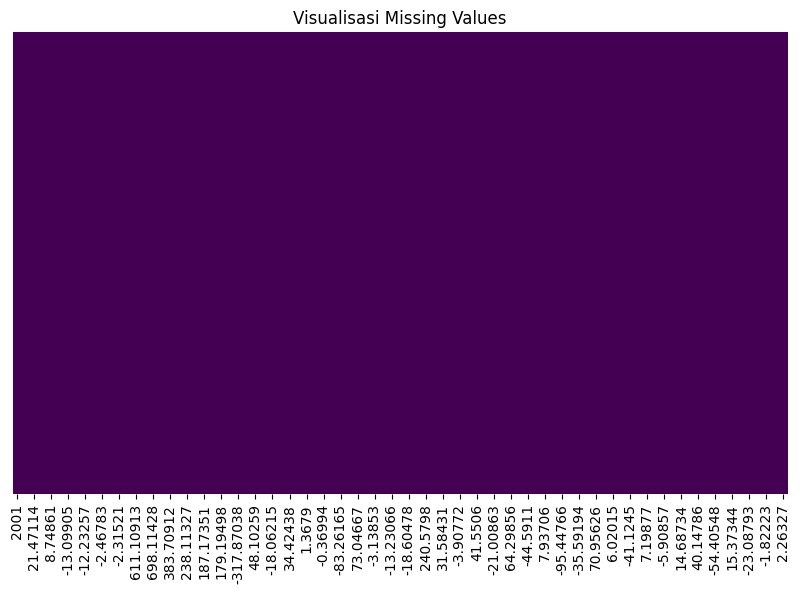

In [14]:
# Memuat dataset
# Mount Google Drive ke Google Colab
from google.colab import drive
drive.mount('/content/drive')

# Setelah berhasil mount, Anda bisa mengakses file di Drive
# Ganti path berikut sesuai dengan lokasi file di Google Drive Anda

file_path = '/content/drive/MyDrive/RegresiUTSTelkom.csv'

# Pastikan path sudah benar dengan mengecek file

import os


    # Membaca file CSV
import pandas as pd
df = pd.read_csv(file_path)
    # Tampilkan 5 baris pertama untuk verifikasi
print("\nPreview 5 data pertama:")
display(df.head())






# Menampilkan 5 data pertama
print("Preview 5 data pertama:")
display(df.head())

# Melihat informasi dataset
print("\nInformasi Dataset:")
display(df.info())

# Statistik deskriptif
print("\nStatistik Deskriptif:")
display(df.describe())

# Memeriksa missing values
print("\nJumlah Missing Values per kolom:")
display(df.isnull().sum())

# Menampilkan visualisasi missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Visualisasi Missing Values')
plt.show()

plt.show()
Sekarang kita akan melakukan analisis distribusi dan korelasi untuk lebih memahami dataset.

Fitur Numerik: ['2001', '49.94357', '21.47114', '73.0775', '8.74861', '-17.40628', '-13.09905', '-25.01202', '-12.23257', '7.83089', '-2.46783', '3.32136', '-2.31521', '10.20556', '611.10913', '951.0896', '698.11428', '408.98485', '383.70912', '326.51512', '238.11327', '251.42414', '187.17351', '100.42652', '179.19498', '-8.41558', '-317.87038', '95.86266', '48.10259', '-95.66303', '-18.06215', '1.96984', '34.42438', '11.7267', '1.3679', '7.79444', '-0.36994', '-133.67852', '-83.26165', '-37.29765', '73.04667', '-37.36684', '-3.13853', '-24.21531', '-13.23066', '15.93809', '-18.60478', '82.15479', '240.5798', '-10.29407', '31.58431', '-25.38187', '-3.90772', '13.29258', '41.5506', '-7.26272', '-21.00863', '105.50848', '64.29856', '26.08481', '-44.5911', '-8.30657', '7.93706', '-10.7366', '-95.44766', '-82.03307', '-35.59194', '4.69525', '70.95626', '28.09139', '6.02015', '-37.13767', '-41.1245', '-8.40816', '7.19877', '-8.60176', '-5.90857', '-12.32437', '14.68734', '-54.32125', '40.14

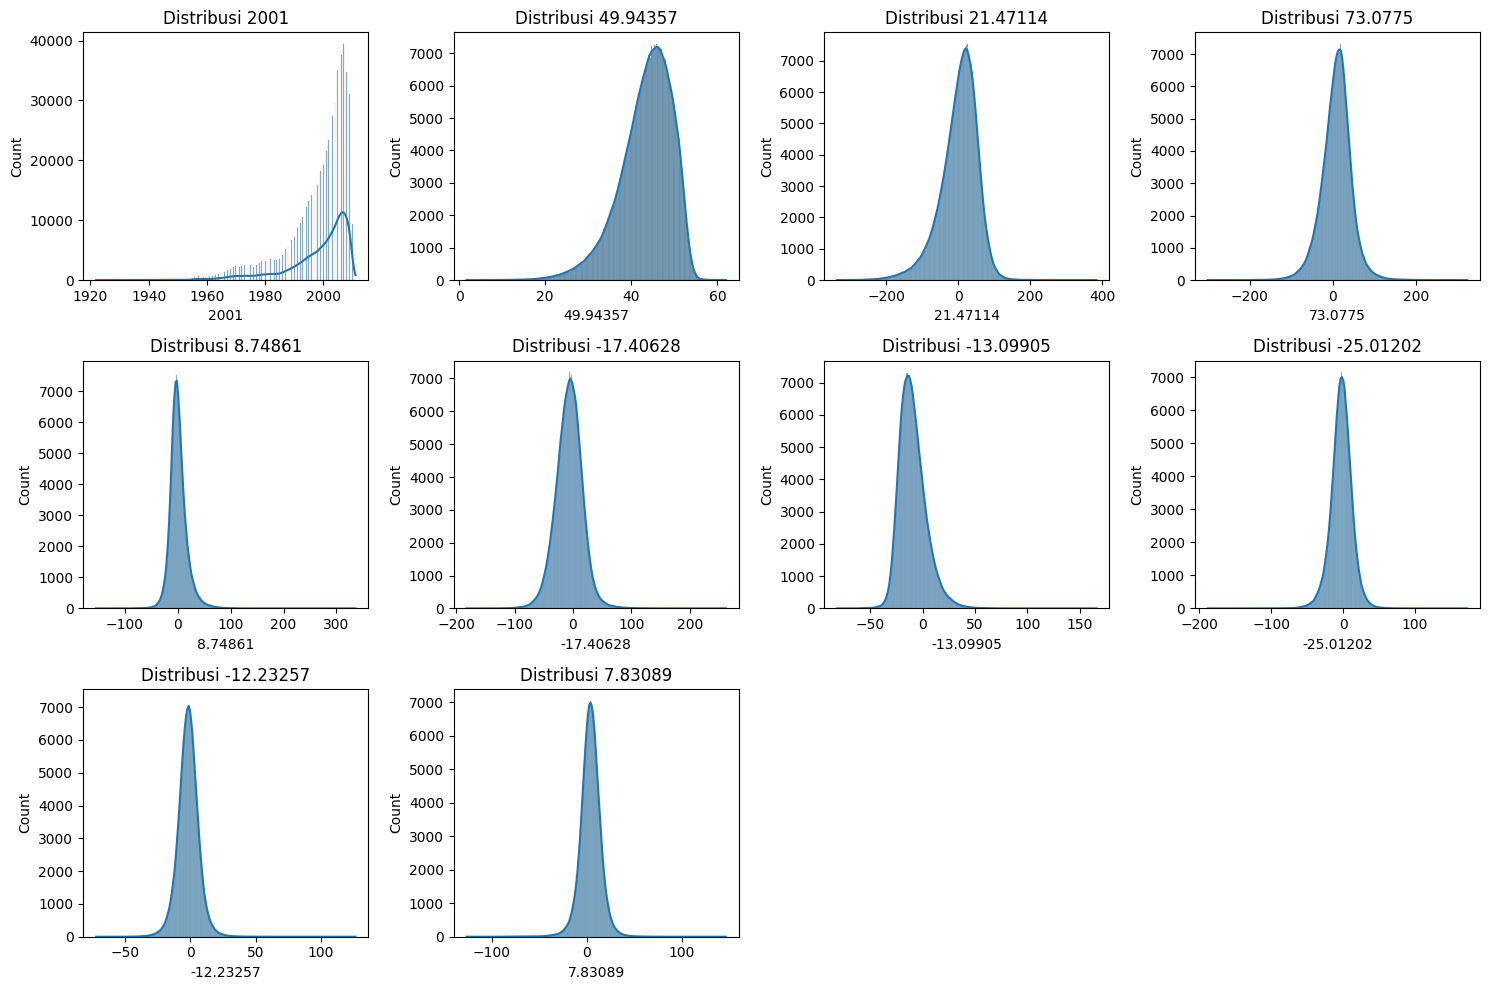

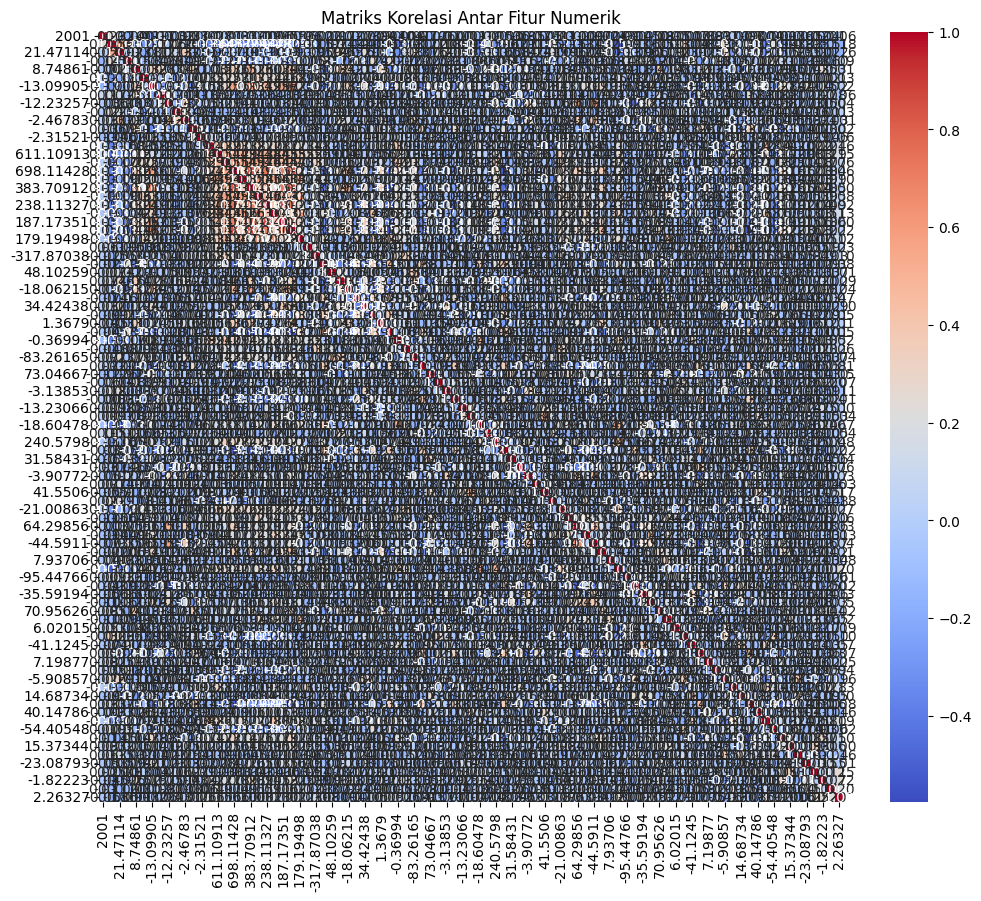

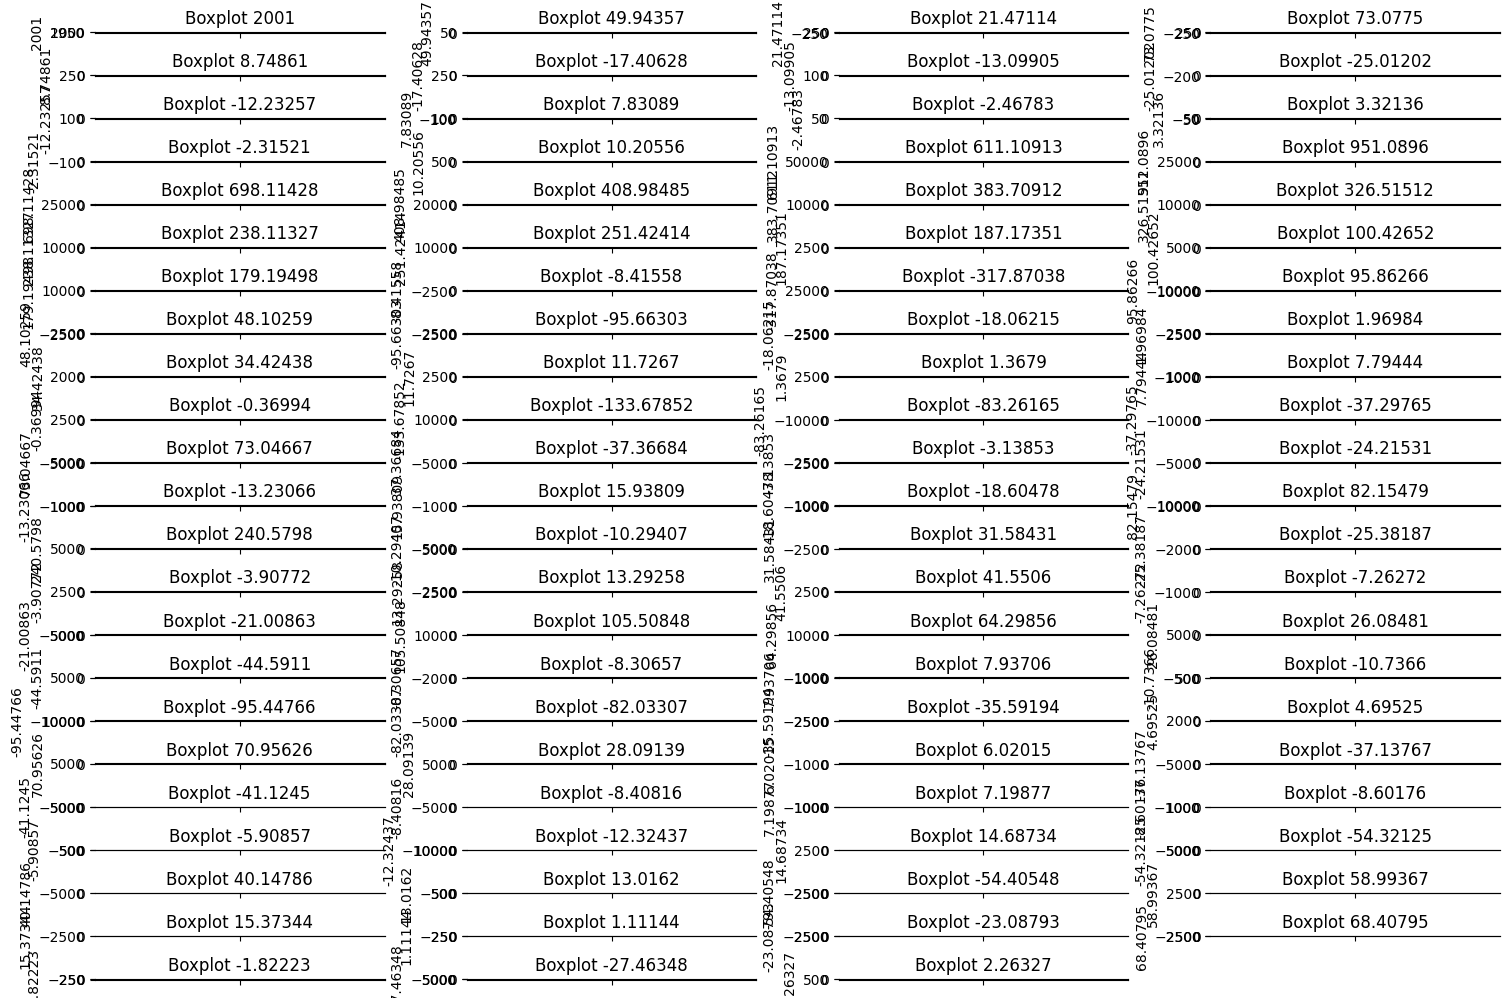

<Figure size 1200x1000 with 0 Axes>

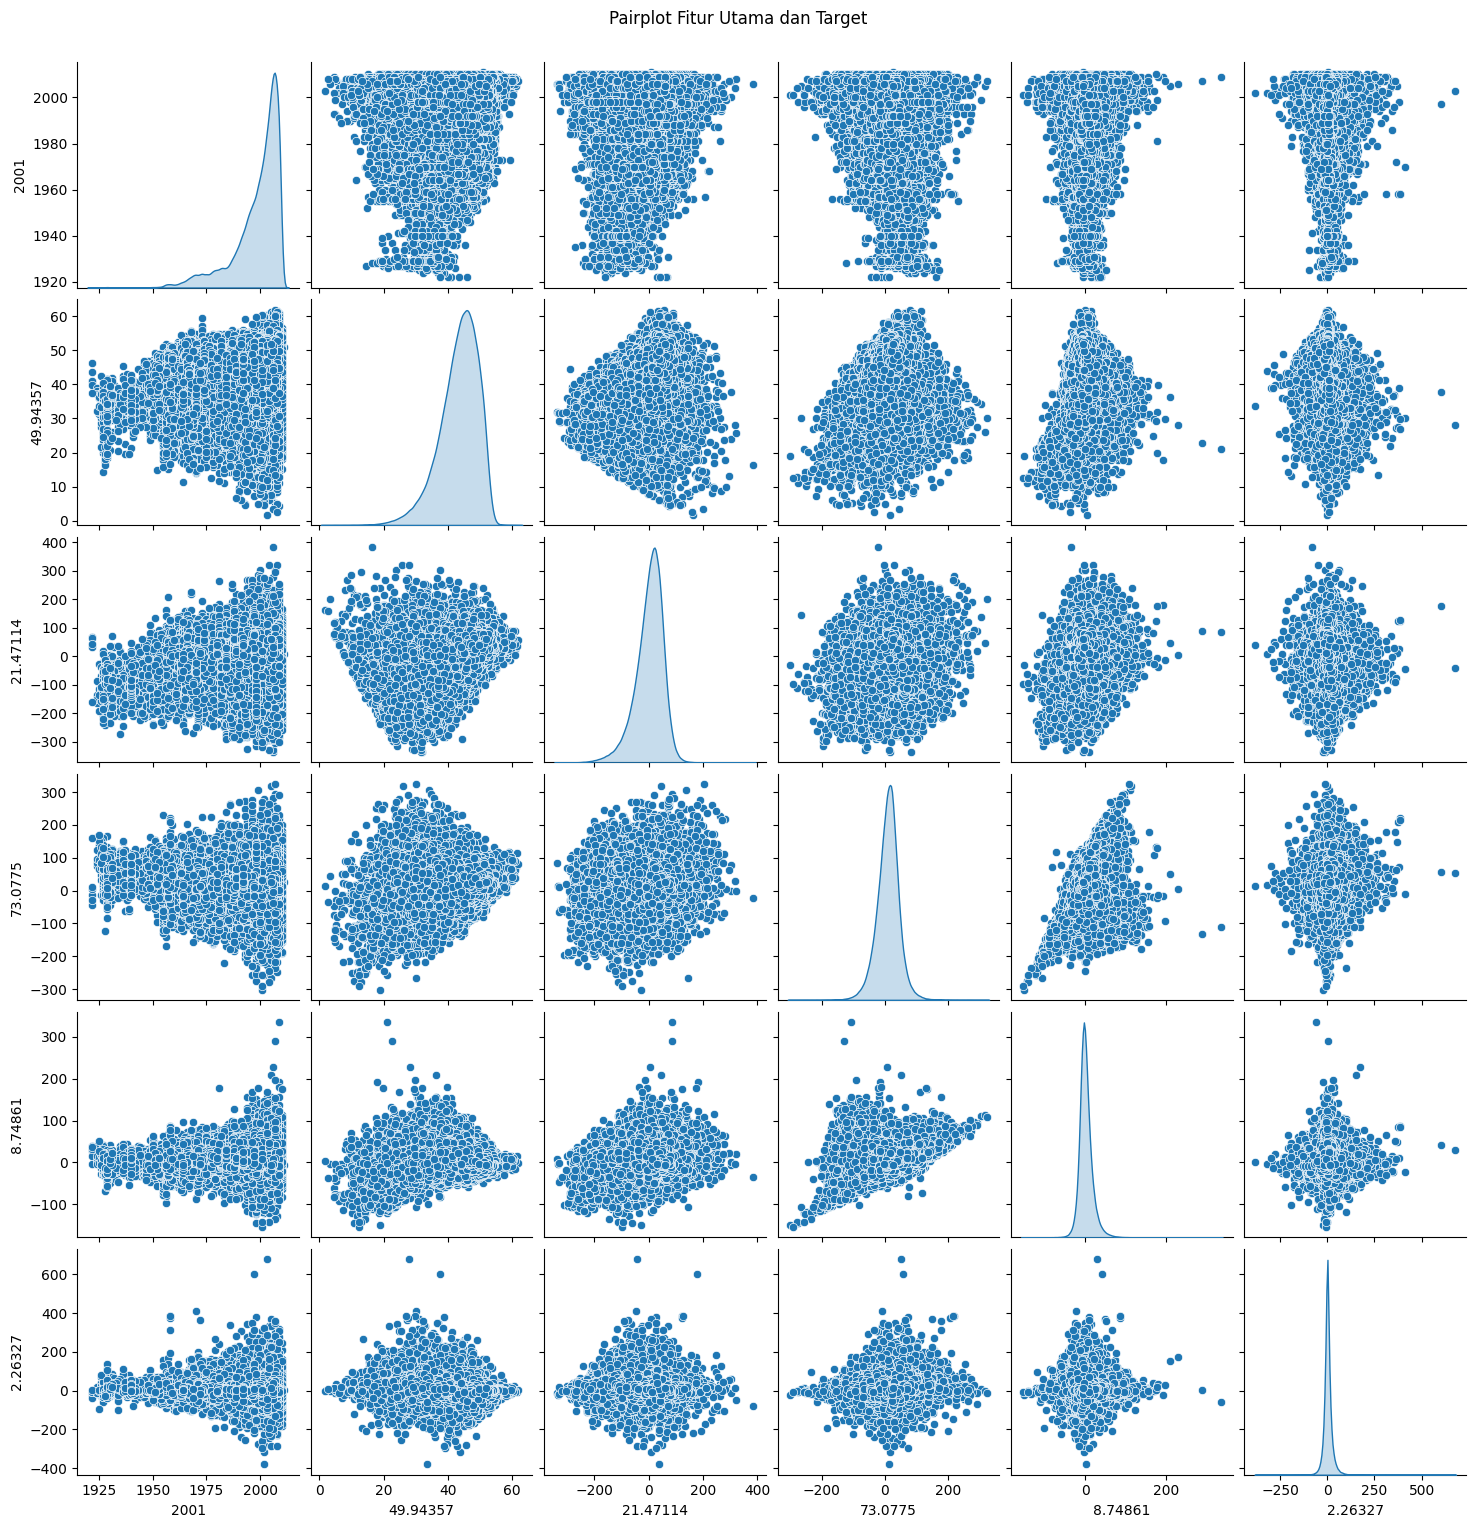

In [5]:
# Memisahkan fitur numerik dan kategorikal
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

print(f"Fitur Numerik: {numerical_features}")
print(f"Fitur Kategorikal: {categorical_features}")

# Visualisasi distribusi fitur numerik
# Selecting only the first 10 numerical features for visualization
selected_features = numerical_features[:10]

plt.figure(figsize=(15, 10))
for i, feature in enumerate(selected_features):
    plt.subplot(3, 4, i+1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribusi {feature}')
    plt.tight_layout()
plt.show()

# Analisis korelasi antar fitur numerik
plt.figure(figsize=(12, 10))
correlation_matrix = df[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi Antar Fitur Numerik')
plt.show()

# Boxplot untuk melihat outliers
plt.figure(figsize=(15, 10))
# Calculating the number of rows needed
num_rows = int(np.ceil(len(numerical_features) / 4)) # Adjust 4 if you want more columns
# num_rows = int(np.ceil(len(selected_features) / 4)) # Use this to plot only the selected_features

for i, feature in enumerate(numerical_features):
# for i, feature in enumerate(selected_features): # Use this to plot only the selected_features
    plt.subplot(num_rows, 4, i+1) # Adjust 4 if you want more columns in the grid
    sns.boxplot(y=df[feature])
    plt.title(f'Boxplot {feature}')
    plt.tight_layout()
plt.show()

# Pairplot untuk melihat hubungan antar beberapa fitur utama dan target
# Asumsikan kolom terakhir adalah target
target_column = numerical_features[-1]
features_to_plot = numerical_features[:5] + [target_column]  # 5 fitur pertama + target
plt.figure(figsize=(12, 10))
sns.pairplot(df[features_to_plot], diag_kind='kde')
plt.suptitle('Pairplot Fitur Utama dan Target', y=1.02)
plt.show()

##2. Feature Engineering
Dari hasil eksplorasi data, kita akan melakukan feature engineering yang mencakup:

1. Penanganan missing values
2. Penanganan outliers
3. Transformasi data (scaling)
4. Encoding fitur kategorikal

In [6]:
# Pisahkan fitur (X) dan target (y)
# Asumsikan kolom terakhir adalah target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split data menjadi training dan testing set (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Bentuk data training X:", X_train.shape)
print("Bentuk data testing X:", X_test.shape)
print("Bentuk data training y:", y_train.shape)
print("Bentuk data testing y:", y_test.shape)

# Identifikasi kolom numerik dan kategorikal
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Preprocessing pipeline untuk fitur numerik
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Mengisi missing values dengan median
    ('scaler', StandardScaler())  # Standardisasi fitur numerik
])

# Preprocessing pipeline untuk fitur kategorikal
# Jika ada fitur kategorikal
if len(categorical_features) > 0:
    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),  # Mengisi missing values dengan modus
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))  # One-hot encoding
    ])

    # Gabungkan preprocessing untuk semua fitur
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)
        ])
else:
    # Jika tidak ada fitur kategorikal
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features)
        ])

# Terapkan preprocessing
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("Bentuk data training setelah preprocessing:", X_train_processed.shape)
print("Bentuk data testing setelah preprocessing:", X_test_processed.shape)

# Feature Importance Analysis (akan digunakan nanti)
# Simpan preprocessor untuk digunakan nanti
import joblib
joblib.dump(preprocessor, 'preprocessor.pkl')

Bentuk data training X: (412275, 90)
Bentuk data testing X: (103069, 90)
Bentuk data training y: (412275,)
Bentuk data testing y: (103069,)
Bentuk data training setelah preprocessing: (412275, 90)
Bentuk data testing setelah preprocessing: (103069, 90)


['preprocessor.pkl']

##3. Membangun Model MLP dengan TensorFlow
Sekarang kita akan membangun model MLP untuk regresi menggunakan TensorFlow. Kita akan membuat beberapa arsitektur dan membandingkan hasilnya.
##3.1 Model MLP Dasar

In [7]:
def build_mlp_model(input_shape, architecture=[64, 32], dropout_rate=0.2,
                    learning_rate=0.001, regularization=None):
    """
    Membangun model MLP dengan konfigurasi yang ditentukan

    Parameters:
    input_shape (int): Jumlah fitur input
    architecture (list): Daftar jumlah neuron per hidden layer
    dropout_rate (float): Tingkat dropout untuk regularisasi
    learning_rate (float): Learning rate untuk optimizer
    regularization (str): Jenis regularisasi ('l1', 'l2', atau None)

    Returns:
    model: Model MLP yang sudah dikompilasi
    """
    model = Sequential()

    # Input layer
    if regularization == 'l1':
        model.add(Dense(architecture[0], activation='relu', input_shape=(input_shape,),
                        kernel_regularizer=l1(0.01)))
    elif regularization == 'l2':
        model.add(Dense(architecture[0], activation='relu', input_shape=(input_shape,),
                        kernel_regularizer=l2(0.01)))
    else:
        model.add(Dense(architecture[0], activation='relu', input_shape=(input_shape,)))

    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))

    # Hidden layers
    for units in architecture[1:]:
        if regularization == 'l1':
            model.add(Dense(units, activation='relu', kernel_regularizer=l1(0.01)))
        elif regularization == 'l2':
            model.add(Dense(units, activation='relu', kernel_regularizer=l2(0.01)))
        else:
            model.add(Dense(units, activation='relu'))

        model.add(BatchNormalization())
        model.add(Dropout(dropout_rate))

    # Output layer
    model.add(Dense(1))  # 1 neuron untuk regresi

    # Compile model dengan MSE loss
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

    return model

# Mendapatkan input shape dari data yang telah diproses
input_shape = X_train_processed.shape[1]

# Membangun model MLP dasar
mlp_model = build_mlp_model(
    input_shape=input_shape,
    architecture=[128, 64, 32],  # 3 hidden layers
    dropout_rate=0.2,
    learning_rate=0.001
)

# Menampilkan ringkasan model
mlp_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │        11,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,913 (89.50 KB)

 Trainable params: 22,465 (87.75 KB)

 Non-trainable params: 448 (1.75 KB)

##3.2 Melatih Model
Kita akan menggunakan callbacks untuk mengoptimalkan proses pelatihan:

1. EarlyStopping: Menghentikan pelatihan jika tidak ada peningkatan
2. ReduceLROnPlateau: Mengurangi learning rate jika performa stagnan
3. ModelCheckpoint: Menyimpan model terbaik

In [8]:
# Membuat direktori untuk menyimpan model
checkpoint_dir = 'model_checkpoints'
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)

# Callbacks
callbacks = [
    EarlyStopping(
        monitor='val_loss',
        patience=30,
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=10,
        min_lr=1e-6,
        verbose=1
    ),
    ModelCheckpoint(
        filepath=os.path.join(checkpoint_dir, 'best_model.h5'),
        monitor='val_loss',
        save_best_only=True,
        verbose=1
    )
]

# Melatih model
history = mlp_model.fit(
    X_train_processed, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2,
    callbacks=callbacks,
    verbose=1
)

# Evaluasi model pada data testing
y_pred = mlp_model.predict(X_test_processed)

# Menghitung metrik evaluasi
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Epoch 1/20
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 268.7682 - mae: 10.6826
Epoch 1: val_loss improved from inf to 125.80297, saving model to model_checkpoints/best_model.h5


10307/10307 ━━━━━━━━━━━━━━━━━━━━ 44s 4ms/step - loss: 268.7637 - mae: 10.6826 - val_loss: 125.8030 - val_mae: 7.5609 - learning_rate: 0.0010
Epoch 2/20
10300/10307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 182.5224 - mae: 9.1972
Epoch 2: val_loss improved from 125.80297 to 117.07359, saving model to model_checkpoints/best_model.h5


10307/10307 ━━━━━━━━━━━━━━━━━━━━ 80s 4ms/step - loss: 182.5186 - mae: 9.1971 - val_loss: 117.0736 - val_mae: 7.2888 - learning_rate: 0.0010
Epoch 3/20
10290/10307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 170.9605 - mae: 8.9689
Epoch 3: val_loss improved from 117.07359 to 111.88892, saving model to model_checkpoints/best_model.h5


10307/10307 ━━━━━━━━━━━━━━━━━━━━ 36s 3ms/step - loss: 170.9542 - mae: 8.9687 - val_loss: 111.8889 - val_mae: 7.0707 - learning_rate: 0.0010
Epoch 4/20
10290/10307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 162.9521 - mae: 8.8065
Epoch 4: val_loss did not improve from 111.88892
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 35s 3ms/step - loss: 162.9483 - mae: 8.8064 - val_loss: 112.6262 - val_mae: 7.0490 - learning_rate: 0.0010
Epoch 5/20
10289/10307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 158.9881 - mae: 8.7235
Epoch 5: val_loss did not improve from 111.88892
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 39s 4ms/step - loss: 158.9847 - mae: 8.7234 - val_loss: 112.4736 - val_mae: 6.9601 - learning_rate: 0.0010
Epoch 6/20
10305/10307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 155.8374 - mae: 8.6626
Epoch 6: val_loss improved from 111.88892 to 109.78239, saving model to model_checkpoints/best_model.h5


10307/10307 ━━━━━━━━━━━━━━━━━━━━ 34s 3ms/step - loss: 155.8367 - mae: 8.6626 - val_loss: 109.7824 - val_mae: 6.9397 - learning_rate: 0.0010
Epoch 7/20
10296/10307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 152.4906 - mae: 8.5965
Epoch 7: val_loss did not improve from 109.78239
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 35s 3ms/step - loss: 152.4890 - mae: 8.5965 - val_loss: 119.3784 - val_mae: 6.9547 - learning_rate: 0.0010
Epoch 8/20
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 150.4456 - mae: 8.5443
Epoch 8: val_loss did not improve from 109.78239
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - loss: 150.4455 - mae: 8.5443 - val_loss: 113.6274 - val_mae: 6.8954 - learning_rate: 0.0010
Epoch 9/20
10292/10307 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 149.4910 - mae: 8.5127
Epoch 9: val_loss did not improve from 109.78239
10307/10307 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - loss: 149.4886 - mae: 8.5127 - val_loss: 114.6423 - val_mae: 6.8768 - learning_rate: 0.0010
Epoch 10/20
10303/10307 ━━━━━━━━

##3.3 Visualisasi Hasil

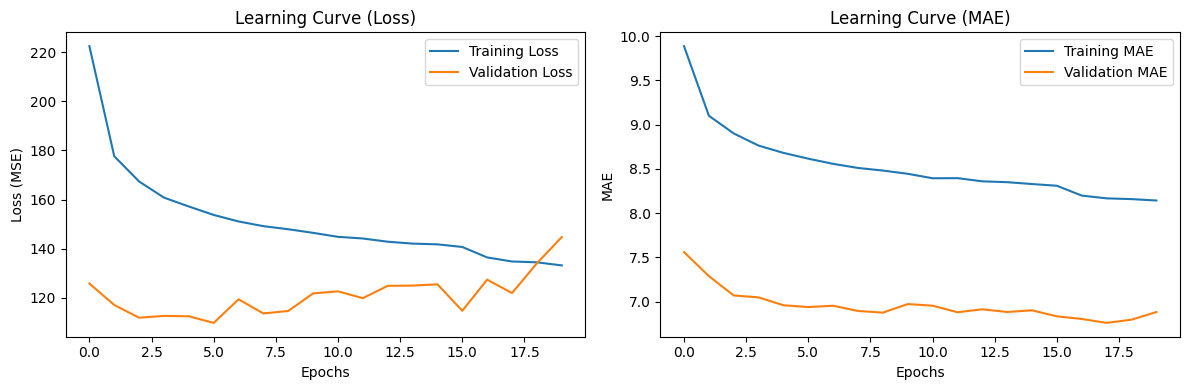

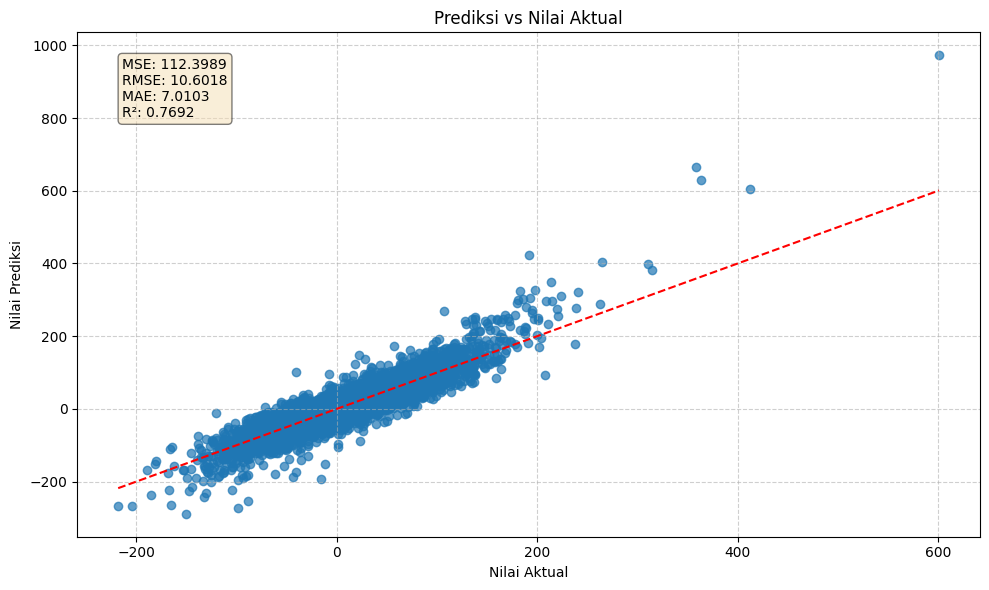

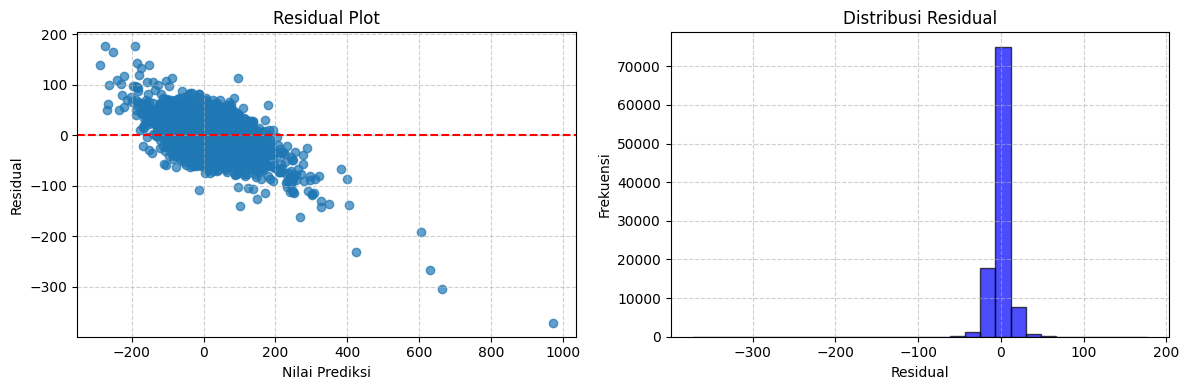

In [9]:
# Visualisasi kurva pembelajaran
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Learning Curve (Loss)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Learning Curve (MAE)')
plt.legend()
plt.tight_layout()
plt.show()

# Visualisasi prediksi vs nilai aktual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Nilai Aktual')
plt.ylabel('Nilai Prediksi')
plt.title('Prediksi vs Nilai Aktual')
plt.grid(True, linestyle='--', alpha=0.6)

# Menambahkan informasi metrik pada plot
textstr = '\n'.join((
    f'MSE: {mse:.4f}',
    f'RMSE: {rmse:.4f}',
    f'MAE: {mae:.4f}',
    f'R²: {r2:.4f}'
))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=10,
         verticalalignment='top', bbox=props)

plt.tight_layout()
plt.show()

# Visualisasi distribusi residual (error)
residuals = y_test - y_pred.flatten()
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Nilai Prediksi')
plt.ylabel('Residual')
plt.title('Residual Plot')
plt.grid(True, linestyle='--', alpha=0.6)

plt.subplot(1, 2, 2)
plt.hist(residuals, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.xlabel('Residual')
plt.ylabel('Frekuensi')
plt.title('Distribusi Residual')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

##4. Eksperimen dengan Arsitektur yang Berbeda
Untuk menjawab pertanyaan soal analisa #1, kita akan membandingkan beberapa arsitektur MLP.


Melatih model dengan arsitektur: [256, 128, 64]
Restoring model weights from the end of the best epoch: 2.
3221/3221 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
MSE: 114.0733, RMSE: 10.6805, R²: 0.7658

Melatih model dengan arsitektur: [512, 256, 128, 64]
Restoring model weights from the end of the best epoch: 1.
3221/3221 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
MSE: 132.8807, RMSE: 11.5274, R²: 0.7271

Melatih model dengan arsitektur: [512, 256, 128]
Restoring model weights from the end of the best epoch: 2.
3221/3221 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
MSE: 127.8732, RMSE: 11.3081, R²: 0.7374

Melatih model dengan arsitektur: [256, 256, 256]
Restoring model weights from the end of the best epoch: 2.
3221/3221 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
MSE: 124.0511, RMSE: 11.1378, R²: 0.7453

Melatih model dengan arsitektur: [512, 384, 256, 128, 64]
Restoring model weights from the end of the best epoch: 1.
3221/3221 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
MSE: 143.3285, RMSE: 11.9720, R²: 0.7057

Melatih model dengan a

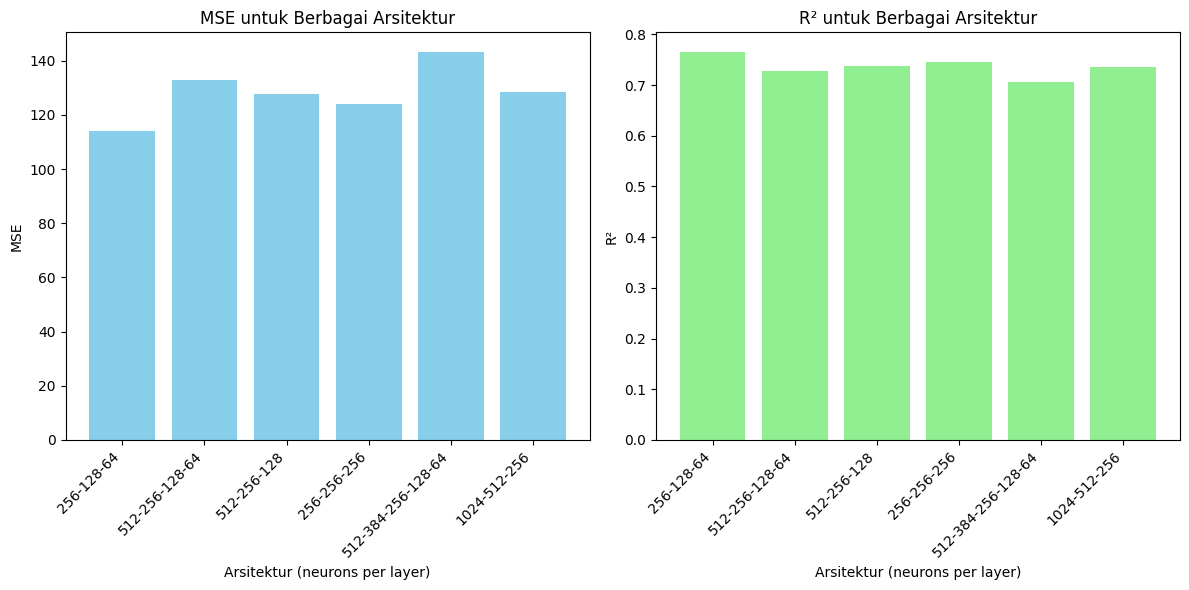

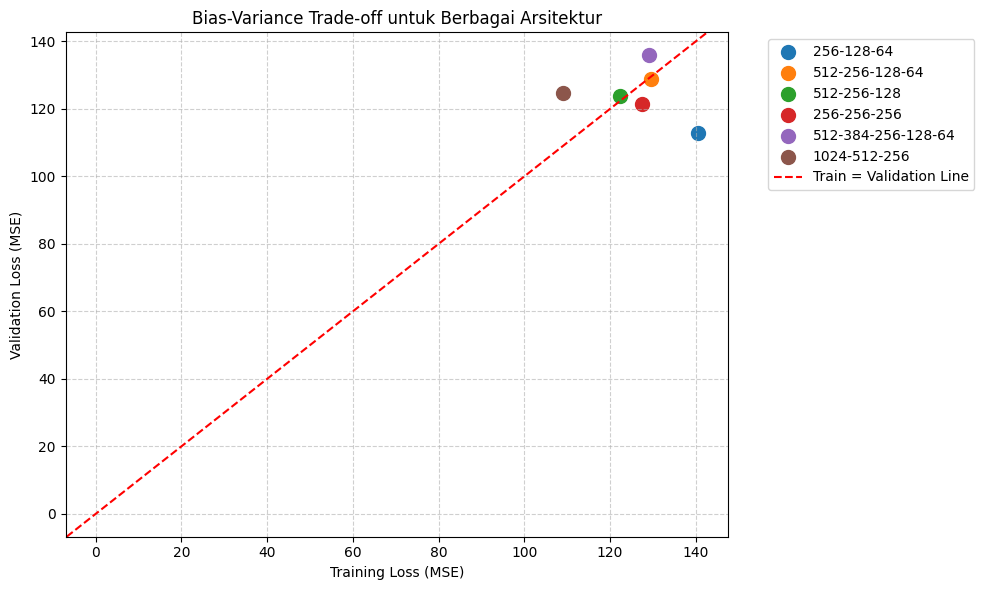

In [10]:
# Membuat fungsi untuk eksperimen dengan berbagai arsitektur
def experiment_architectures():
    # Daftar arsitektur yang akan diuji
    architectures = [
        [256, 128, 64],             # Arsitektur awal (underfitting)
        [512, 256, 128, 64],        # Menambah kapasitas dengan layer tambahan
        [512, 256, 128],            # Menambah kapasitas tanpa layer tambahan
        [256, 256, 256],            # Arsitektur dengan width yang sama
        [512, 384, 256, 128, 64],   # Arsitektur yang lebih dalam
        [1024, 512, 256]            # Arsitektur dengan kapasitas besar
    ]

    results = []

    for arch in architectures:
        # Buat model dengan arsitektur yang ditentukan
        model = build_mlp_model(
            input_shape=input_shape,
            architecture=arch,
            dropout_rate=0.3,  # Sedikit lebih tinggi untuk model yang lebih besar
            learning_rate=0.001
        )

        print(f"\nMelatih model dengan arsitektur: {arch}")

        # Melatih model dengan early stopping
        history = model.fit(
            X_train_processed, y_train,
            epochs=10,  # Mengurangi epochs karena menggunakan early stopping
            batch_size=32,
            validation_split=0.2,
            callbacks=[
                EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True, verbose=1)
            ],
            verbose=0
        )

        # Evaluasi model
        y_pred = model.predict(X_test_processed)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)

        # Simpan hasil
        results.append({
            'architecture': arch,
            'mse': mse,
            'rmse': rmse,
            'r2': r2,
            'val_loss': min(history.history['val_loss']),
            'train_loss': history.history['loss'][-1],
            'epochs_trained': len(history.history['loss'])
        })

        print(f"MSE: {mse:.4f}, RMSE: {rmse:.4f}, R²: {r2:.4f}")

    return results

# Jalankan eksperimen
architecture_results = experiment_architectures()

# Visualisasi perbandingan hasil eksperimen
plt.figure(figsize=(12, 6))

# Plot MSE untuk setiap arsitektur
plt.subplot(1, 2, 1)
architectures = [f"{'-'.join(map(str, r['architecture']))}" for r in architecture_results]
mse_values = [r['mse'] for r in architecture_results]
plt.bar(architectures, mse_values, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Arsitektur (neurons per layer)')
plt.ylabel('MSE')
plt.title('MSE untuk Berbagai Arsitektur')

# Plot R-squared untuk setiap arsitektur
plt.subplot(1, 2, 2)
r2_values = [r['r2'] for r in architecture_results]
plt.bar(architectures, r2_values, color='lightgreen')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Arsitektur (neurons per layer)')
plt.ylabel('R²')
plt.title('R² untuk Berbagai Arsitektur')

plt.tight_layout()
plt.show()

# Plot untuk menunjukkan bias-variance tradeoff
plt.figure(figsize=(10, 6))
for i, result in enumerate(architecture_results):
    plt.scatter(result['train_loss'], result['val_loss'], s=100,
                label=f"{'-'.join(map(str, result['architecture']))}")

plt.axline([0, 0], [1, 1], color='red', linestyle='--', label='Train = Validation Line')
plt.xlabel('Training Loss (MSE)')
plt.ylabel('Validation Loss (MSE)')
plt.title('Bias-Variance Trade-off untuk Berbagai Arsitektur')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

##5. Eksperimen dengan Loss Functions yang Berbeda
Untuk menjawab pertanyaan soal analisa #2, kita akan membandingkan beberapa loss functions.


Melatih model dengan loss function: MSE
Restoring model weights from the end of the best epoch: 2.
3221/3221 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
MSE: 117.8575, RMSE: 10.8562, MAE: 7.1863, R²: 0.7580

Melatih model dengan loss function: MAE
Restoring model weights from the end of the best epoch: 10.
3221/3221 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
MSE: 96.3039, RMSE: 9.8135, MAE: 6.6842, R²: 0.8023

Melatih model dengan loss function: Huber
Restoring model weights from the end of the best epoch: 8.
3221/3221 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
MSE: 94.4046, RMSE: 9.7162, MAE: 6.6514, R²: 0.8062

Melatih model dengan loss function: LogCosh
Restoring model weights from the end of the best epoch: 9.
3221/3221 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
MSE: 94.9081, RMSE: 9.7421, MAE: 6.6326, R²: 0.8051


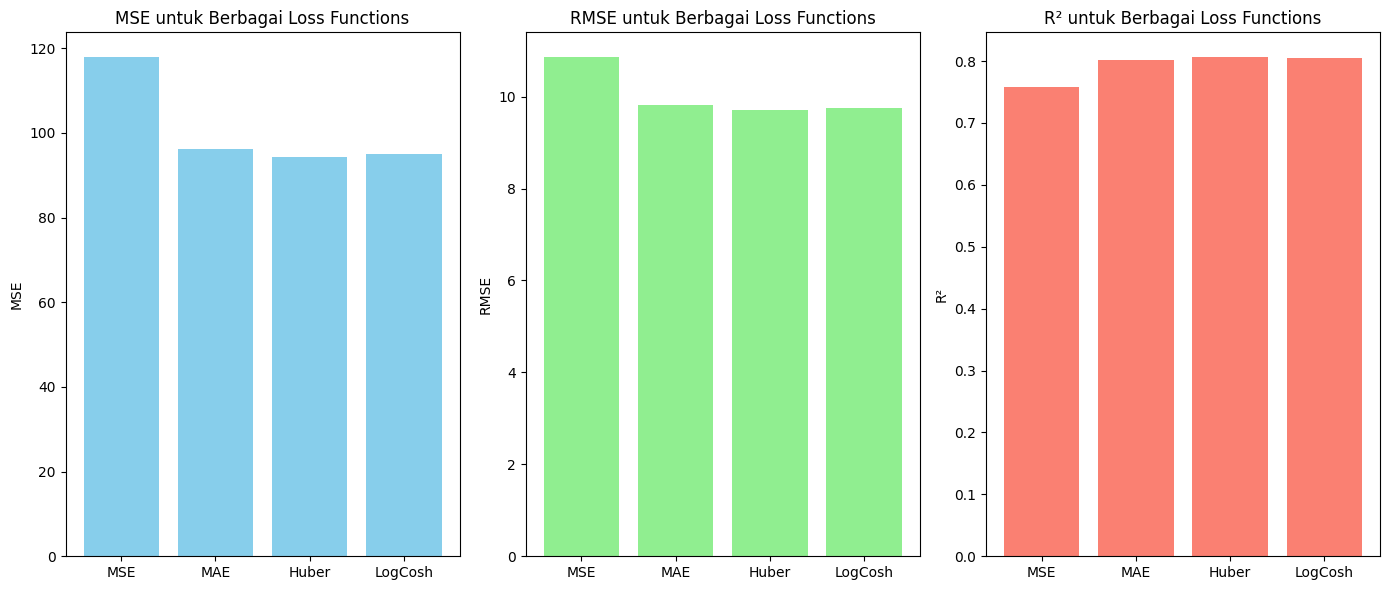

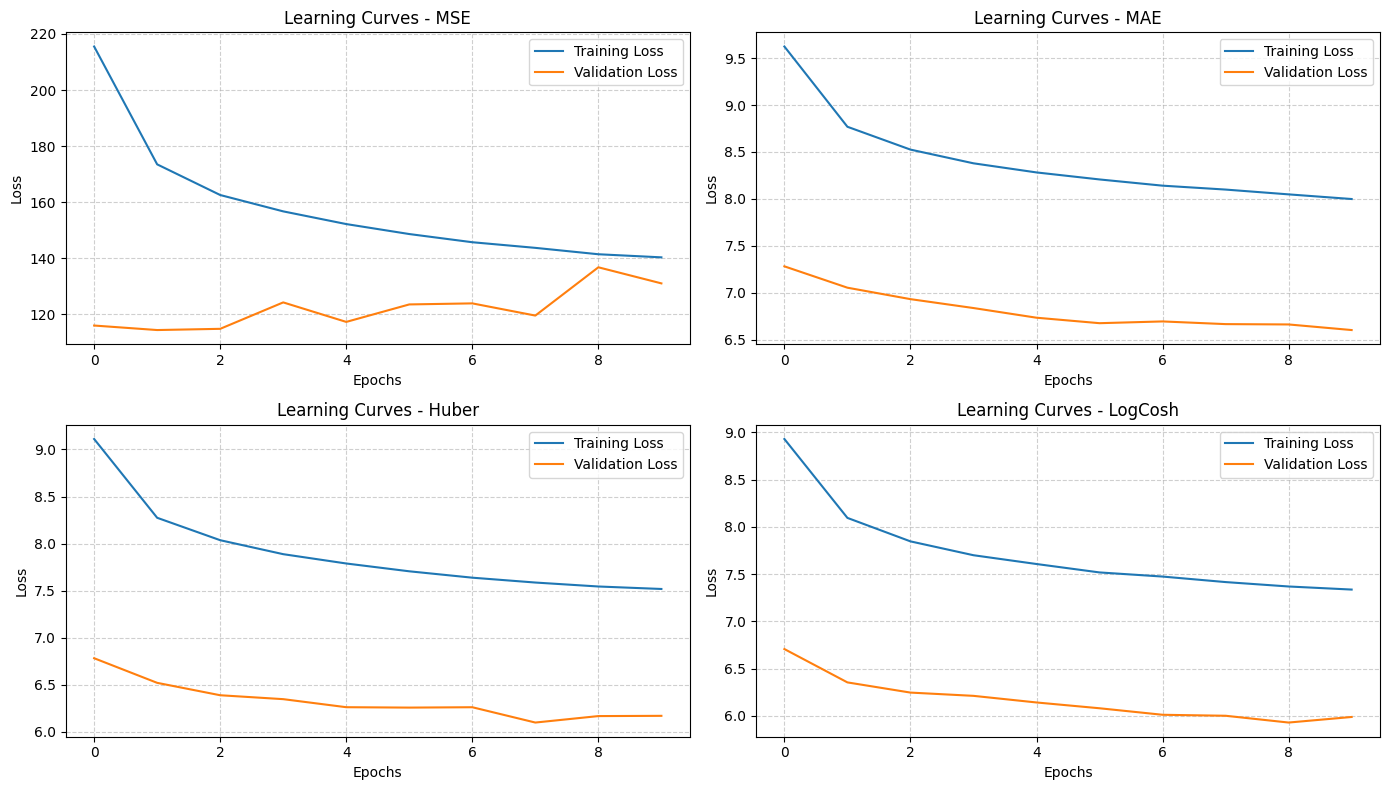

In [11]:
# Fungsi untuk membuat model dengan loss function yang berbeda
def build_model_with_loss(loss_function, learning_rate=0.001):
    model = Sequential([
        Dense(256, activation='relu', input_shape=(input_shape,)),
        BatchNormalization(),
        Dropout(0.3),
        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1)
    ])

    # Compile dengan loss function yang ditentukan
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss=loss_function, metrics=['mae'])

    return model

# Daftar loss function yang akan diuji
loss_functions = {
    'MSE': 'mse',
    'MAE': 'mae',
    'Huber': tf.keras.losses.Huber(delta=1.0),
    'LogCosh': 'log_cosh'
}

loss_results = []

for name, loss_fn in loss_functions.items():
    print(f"\nMelatih model dengan loss function: {name}")

    # Buat dan latih model
    model = build_model_with_loss(loss_fn)

    history = model.fit(
        X_train_processed, y_train,
        epochs=10,
        batch_size=32,
        validation_split=0.2,
        callbacks=[
            EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True, verbose=1)
        ],
        verbose=0
    )

    # Evaluasi model
    y_pred = model.predict(X_test_processed)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Simpan hasil
    loss_results.append({
        'name': name,
        'mse': mse,
        'rmse': rmse,
        'mae': mae,
        'r2': r2,
        'history': history.history
    })

    print(f"MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}")

# Visualisasi perbandingan metrik untuk setiap loss function
plt.figure(figsize=(14, 6))

# Plot untuk MSE
plt.subplot(1, 3, 1)
names = [r['name'] for r in loss_results]
mse_values = [r['mse'] for r in loss_results]
plt.bar(names, mse_values, color='skyblue')
plt.ylabel('MSE')
plt.title('MSE untuk Berbagai Loss Functions')

# Plot untuk RMSE
plt.subplot(1, 3, 2)
rmse_values = [r['rmse'] for r in loss_results]
plt.bar(names, rmse_values, color='lightgreen')
plt.ylabel('RMSE')
plt.title('RMSE untuk Berbagai Loss Functions')

# Plot untuk R²
plt.subplot(1, 3, 3)
r2_values = [r['r2'] for r in loss_results]
plt.bar(names, r2_values, color='salmon')
plt.ylabel('R²')
plt.title('R² untuk Berbagai Loss Functions')

plt.tight_layout()
plt.show()

# Visualisasi learning curves untuk setiap loss function
plt.figure(figsize=(14, 8))
for i, result in enumerate(loss_results):
    plt.subplot(2, 2, i+1)
    plt.plot(result['history']['loss'], label='Training Loss')
    plt.plot(result['history']['val_loss'], label='Validation Loss')
    plt.title(f'Learning Curves - {result["name"]}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

##6. Analisis Kontribusi Fitur
Untuk menjawab pertanyaan soal analisa #4, kita akan menerapkan metode Permutation Importance untuk mengukur kontribusi relatif dari setiap fitur.

Menggunakan subset 1000 sampel dari 103069 total sampel
Menghitung baseline error...
Baseline error: 115.064605
Waktu: 0.67 detik
Mengevaluasi 90 fitur dengan 5 pengulangan...
Fitur 1/90... Importance = 0.809221 (waktu: 0.48s)
Fitur 2/90... Importance = 0.030525 (waktu: 0.48s)
Fitur 3/90... Importance = 0.217566 (waktu: 0.45s)
Fitur 4/90... Importance = 4.826812 (waktu: 0.45s)
Fitur 5/90... Importance = 2.513439 (waktu: 0.52s)
Fitur 6/90... Importance = 1.400757 (waktu: 0.52s)
Fitur 7/90... Importance = 5.808051 (waktu: 0.45s)
Fitur 8/90... Importance = 0.242577 (waktu: 0.48s)
Fitur 9/90... Importance = -0.601341 (waktu: 0.49s)
Fitur 10/90... Importance = -0.367257 (waktu: 0.48s)
Fitur 11/90... Importance = 2.365410 (waktu: 0.45s)
Fitur 12/90... Importance = 0.811528 (waktu: 0.49s)
Fitur 13/90... Importance = 0.562099 (waktu: 0.53s)
Fitur 14/90... Importance = 5.027277 (waktu: 0.52s)
Fitur 15/90... Importance = 24.185181 (waktu: 0.48s)
Fitur 16/90... Importance = 18.656853 (waktu: 0.56

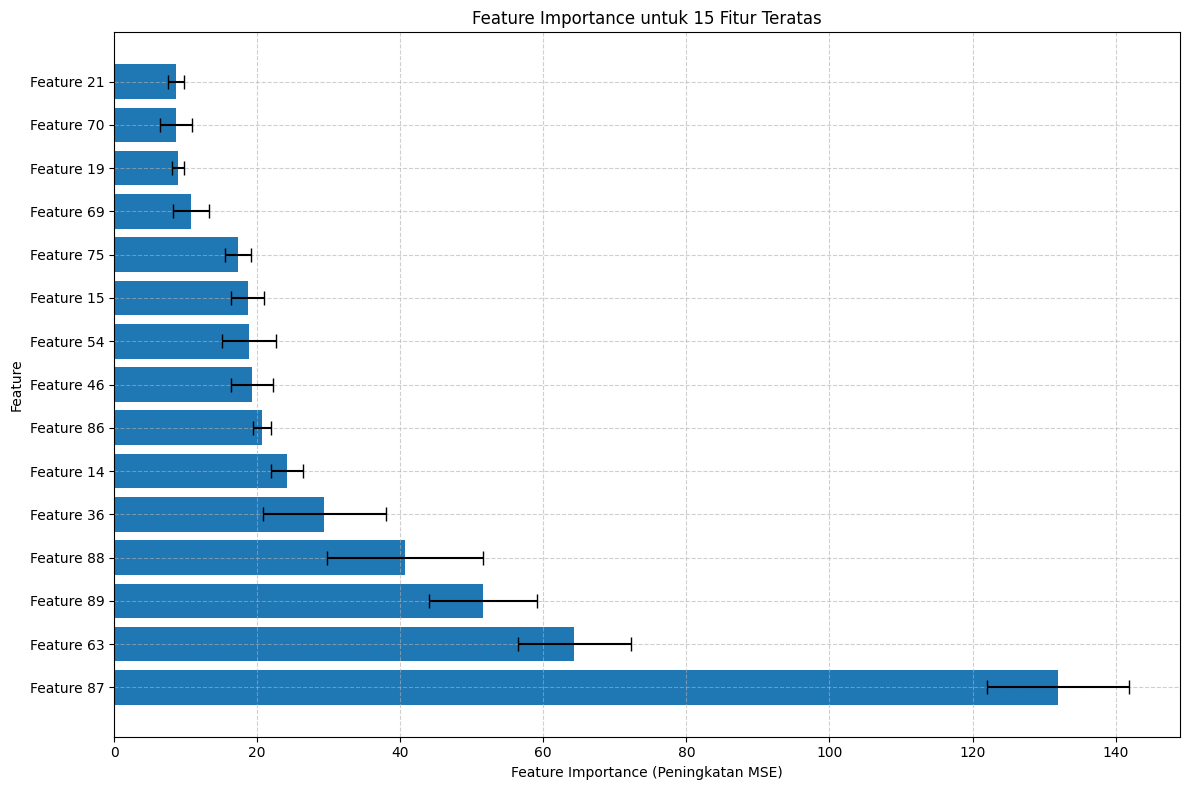

10 Fitur Teratas berdasarkan Importance:


Feature  Importance        Std
87  Feature 87  131.983629   9.914079
63  Feature 63   64.346605   7.843689
89  Feature 89   51.591117   7.543868
88  Feature 88   40.628476  10.923642
36  Feature 36   29.417825   8.622371
14  Feature 14   24.185181   2.252703
86  Feature 86   20.693280   1.310083
46  Feature 46   19.290601   2.889761
54  Feature 54   18.902067   3.751174
15  Feature 15   18.656853   2.358098

In [12]:
# Pendekatan alternatif: Buat fungsi manual untuk feature importance yang dioptimalkan
def manual_feature_importance(model, X, y, n_repeats=5, sample_size=1000, random_state=42, verbose=1):
    """
    Implementasi manual feature importance berdasarkan permutasi

    Parameters:
    model: Model yang akan dievaluasi (misalnya model Keras)
    X: Data fitur
    y: Target
    n_repeats: Jumlah pengulangan untuk permutasi
    sample_size: Ukuran subset data untuk digunakan
    random_state: Random seed untuk reproduktifitas
    verbose: Level output progress (0: tidak ada, 1: per fitur, 2: detail)

    Returns:
    Dictionary dengan importances_mean dan importances_std
    """
    import numpy as np
    from sklearn.metrics import mean_squared_error
    import time

    np.random.seed(random_state)

    # Gunakan subset data jika ukuran data besar
    if X.shape[0] > sample_size:
        if verbose > 0:
            print(f"Menggunakan subset {sample_size} sampel dari {X.shape[0]} total sampel")
        indices = np.random.choice(X.shape[0], sample_size, replace=False)
        X_subset = X[indices]
        y_subset = y.iloc[indices] if hasattr(y, 'iloc') else y[indices]
    else:
        X_subset = X
        y_subset = y

    # Fungsi batch prediction untuk menghemat memori
    def batch_predict(model, X, batch_size=128, verbose=0):
        return model.predict(X, batch_size=batch_size, verbose=verbose)

    # Hitung baseline error
    if verbose > 0:
        print("Menghitung baseline error...")
        start_time = time.time()

    baseline_pred = batch_predict(model, X_subset, verbose=0)
    baseline_error = mean_squared_error(y_subset, baseline_pred)

    if verbose > 0:
        print(f"Baseline error: {baseline_error:.6f}")
        print(f"Waktu: {time.time() - start_time:.2f} detik")
        print(f"Mengevaluasi {X_subset.shape[1]} fitur dengan {n_repeats} pengulangan...")

    n_features = X_subset.shape[1]
    importance_scores = np.zeros((n_repeats, n_features))

    total_start_time = time.time()

    # Untuk setiap fitur
    for feature_idx in range(n_features):
        feature_start_time = time.time()
        if verbose > 0:
            print(f"Fitur {feature_idx+1}/{n_features}... ", end="")

        # Ulangi beberapa kali untuk stabilitas
        for repeat_idx in range(n_repeats):
            # Buat salinan data
            X_permuted = X_subset.copy()

            # Acak nilai fitur ke-i
            X_permuted[:, feature_idx] = np.random.permutation(X_permuted[:, feature_idx])

            # Prediksi dengan fitur yang diacak (tanpa output)
            permuted_pred = batch_predict(model, X_permuted, verbose=0)

            # Hitung peningkatan error
            permuted_error = mean_squared_error(y_subset, permuted_pred)
            importance_scores[repeat_idx, feature_idx] = permuted_error - baseline_error

            if verbose > 1:
                print(f"  Pengulangan {repeat_idx+1}: Δ error = {permuted_error - baseline_error:.6f}")

        if verbose > 0:
            avg_importance = np.mean(importance_scores[:, feature_idx])
            print(f"Importance = {avg_importance:.6f} (waktu: {time.time() - feature_start_time:.2f}s)")

    # Hitung mean dan std dari importance scores
    importances_mean = np.mean(importance_scores, axis=0)
    importances_std = np.std(importance_scores, axis=0)

    if verbose > 0:
        print(f"Total waktu: {time.time() - total_start_time:.2f} detik")

        # Tampilkan top 5 fitur
        indices = np.argsort(importances_mean)[::-1][:5]
        print("\nTop 5 fitur berdasarkan importance:")
        for i, idx in enumerate(indices):
            print(f"{i+1}. Feature {idx}: {importances_mean[idx]:.6f} ± {importances_std[idx]:.6f}")

    return {
        'importances_mean': importances_mean,
        'importances_std': importances_std
    }

# Gunakan fungsi feature importance manual dengan subset data
result = manual_feature_importance(
    mlp_model,
    X_test_processed,
    y_test,
    n_repeats=5,  # Dikurangi dari 10 menjadi 5
    sample_size=1000,  # Gunakan subset 1000 sampel untuk kecepatan
    random_state=42,
    verbose=1  # Tampilkan progress
)

# Ekstrak hasil
importance = result['importances_mean']
std = result['importances_std']

# Buat nama fitur jika tidak tersedia
feature_names = [f'Feature {i}' for i in range(X_train_processed.shape[1])]

# Membuat DataFrame untuk hasil importance
perm_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance,
    'Std': std
})

# Urutkan berdasarkan importance
perm_importance_df = perm_importance_df.sort_values('Importance', ascending=False)

# Visualisasi feature importance
plt.figure(figsize=(12, 8))
plt.barh(perm_importance_df['Feature'][:15], perm_importance_df['Importance'][:15],
         xerr=perm_importance_df['Std'][:15], capsize=5)
plt.xlabel('Feature Importance (Peningkatan MSE)')
plt.ylabel('Feature')
plt.title('Feature Importance untuk 15 Fitur Teratas')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Tampilkan 10 fitur teratas
print("10 Fitur Teratas berdasarkan Importance:")
display(perm_importance_df.head(10))

##7. Eksperimen Learning Rate dan Batch Size
Untuk menjawab pertanyaan soal analisa #5, kita akan membuat grid search sederhana untuk learning rate dan batch size.


Melatih model dengan learning rate: 0.0001, batch size: 16
3221/3221 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
MSE: 148.4959, R²: 0.6951, Training Time: 1188.50s, Epochs: 15

Melatih model dengan learning rate: 0.0001, batch size: 32
3221/3221 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step
MSE: 112.1595, R²: 0.7697, Training Time: 797.08s, Epochs: 20

Melatih model dengan learning rate: 0.0001, batch size: 64
3221/3221 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
MSE: 97.3010, R²: 0.8002, Training Time: 634.56s, Epochs: 33

Melatih model dengan learning rate: 0.0001, batch size: 128
3221/3221 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
MSE: 85.6357, R²: 0.8242, Training Time: 500.09s, Epochs: 50

Melatih model dengan learning rate: 0.001, batch size: 16
3221/3221 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step
MSE: 145.1948, R²: 0.7019, Training Time: 849.77s, Epochs: 11

Melatih model dengan learning rate: 0.001, batch size: 32
3221/3221 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
MSE: 114.1320, R²: 0.7656, Training Time: 542.95s, Epochs: 14

Melatih mod

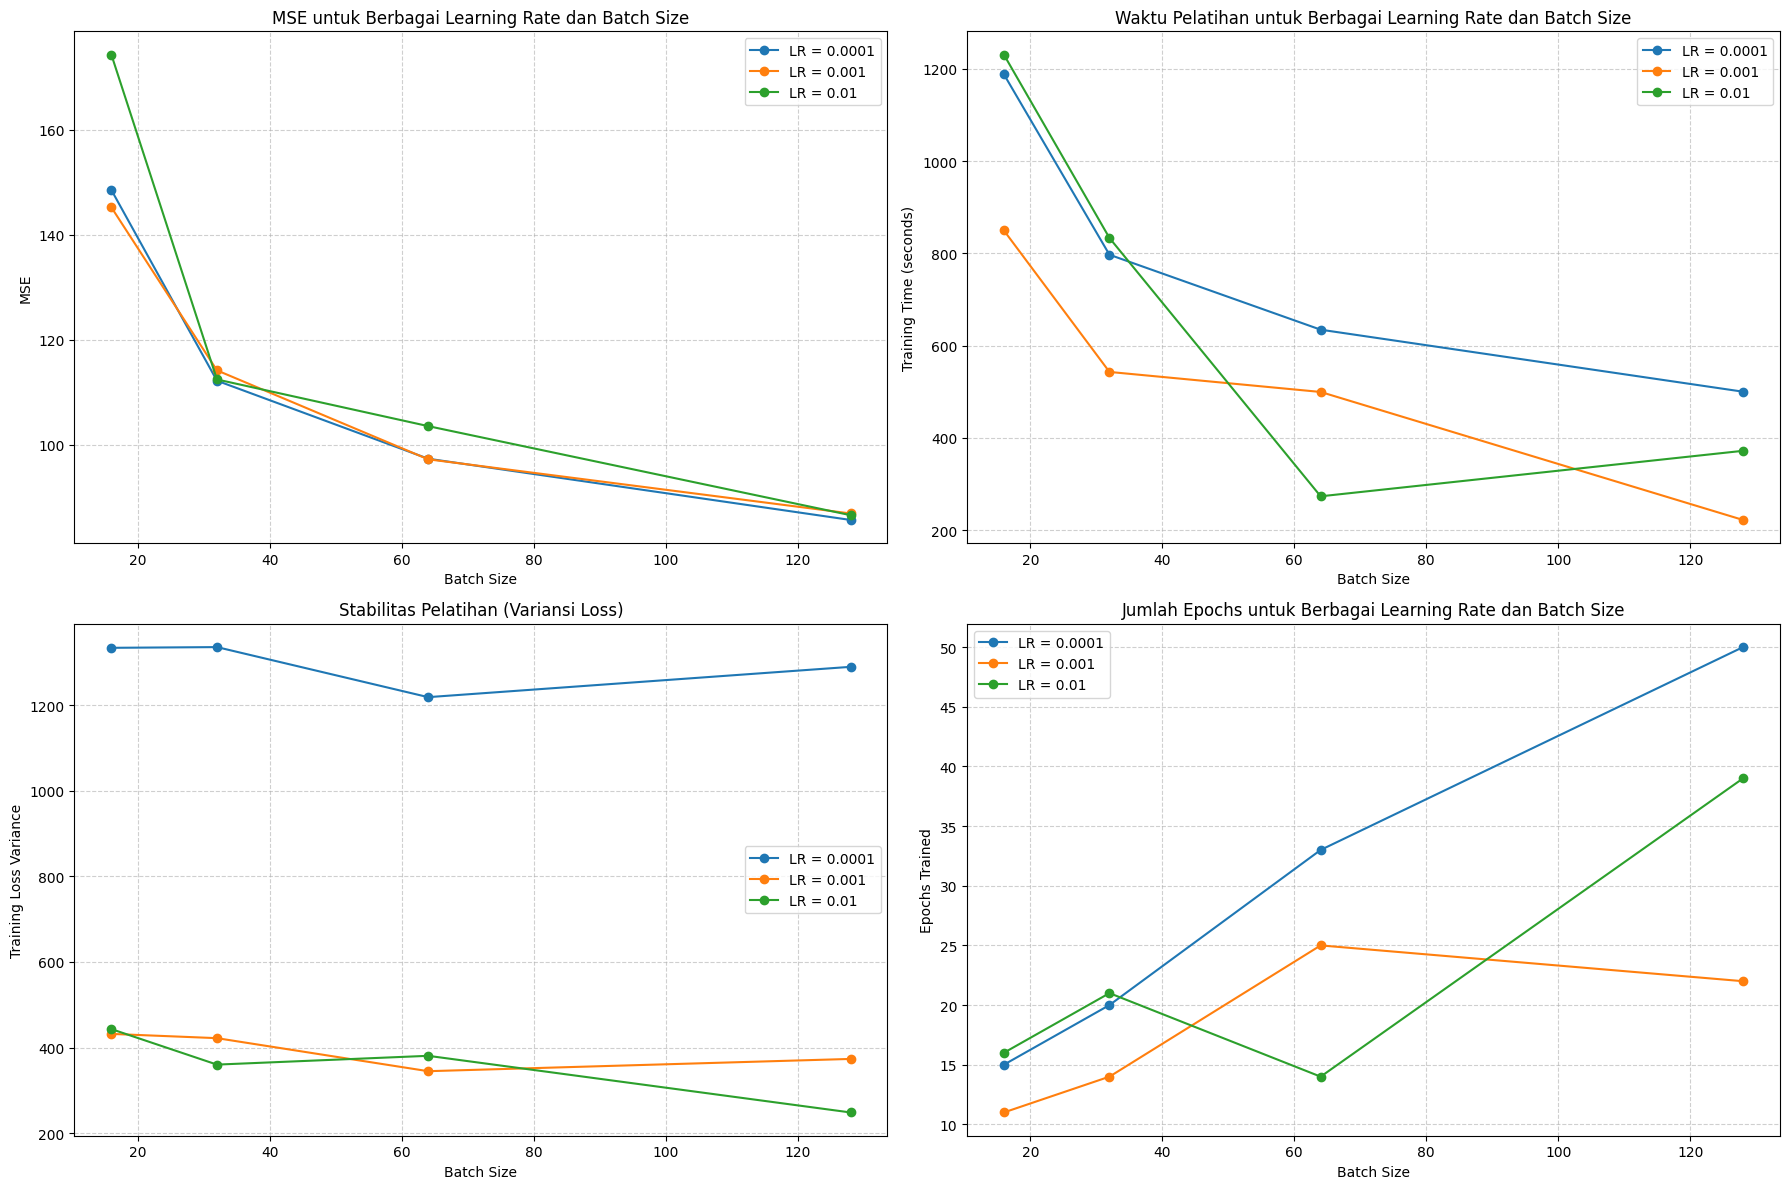

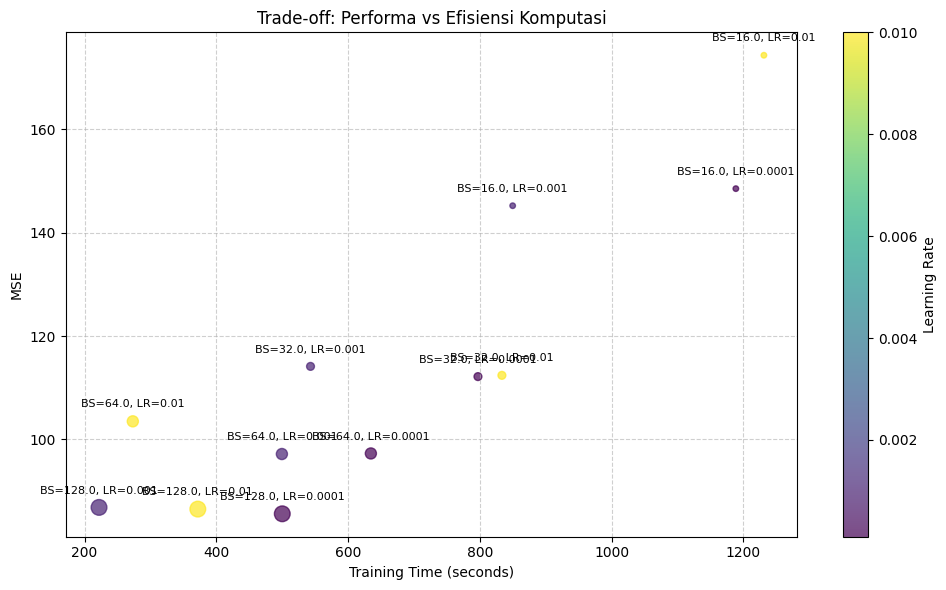

Rangkuman Hasil Grid Search:


learning_rate  batch_size         mse        r2  training_time  \
3          0.0001         128   85.635736  0.824158     500.088765   
11         0.0100         128   86.543765  0.822293     371.905167   
7          0.0010         128   86.870161  0.821623     221.963502   
6          0.0010          64   97.190517  0.800432     499.513119   
2          0.0001          64   97.301035  0.800205     634.557527   
10         0.0100          64  103.511515  0.787452     273.245652   
1          0.0001          32  112.159475  0.769695     797.080850   
9          0.0100          32  112.399333  0.769202     833.433648   
5          0.0010          32  114.132006  0.765645     542.954415   
4          0.0010          16  145.194796  0.701861     849.769973   
0          0.0001          16  148.495929  0.695083    1188.495644   
8          0.0100          16  174.282245  0.642134    1231.084010   

    epochs_trained  train_loss_variance  
3               50          1289.358486  
11              39           248.463239  
7               22           373.486169  
6               25           344.845209  
2               33          1218.557757  
10              14           380.758136  
1               20          1335.470570  
9               21           360.237818  
5               14           422.012170  
4               11           431.966287  
0               15          1333.801384  
8               16           443.145195

In [13]:
# Membuat grid search untuk learning rate dan batch size
def grid_search_lr_batch():
    learning_rates = [0.0001, 0.001, 0.01]
    batch_sizes = [16, 32, 64, 128]

    results = []

    for lr in learning_rates:
        for bs in batch_sizes:
            print(f"\nMelatih model dengan learning rate: {lr}, batch size: {bs}")

            # Buat model
            model = build_mlp_model(
                input_shape=input_shape,
                architecture=[256, 128, 64],
                dropout_rate=0.3,
                learning_rate=lr
            )

            # Catat waktu mulai
            import time
            start_time = time.time()

            # Latih model
            history = model.fit(
                X_train_processed, y_train,
                epochs=50,  # Batasi epochs untuk eksperimen
                batch_size=bs,
                validation_split=0.2,
                callbacks=[
                    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=0)
                ],
                verbose=0
            )

            # Waktu pelatihan
            training_time = time.time() - start_time

            # Evaluasi model
            y_pred = model.predict(X_test_processed)
            mse = mean_squared_error(y_test, y_pred)
            rmse = np.sqrt(mse)
            r2 = r2_score(y_test, y_pred)

            # Hitung training stability (variansi loss)
            train_loss_variance = np.var(history.history['loss'])

            # Simpan hasil
            results.append({
                'learning_rate': lr,
                'batch_size': bs,
                'mse': mse,
                'rmse': rmse,
                'r2': r2,
                'epochs_trained': len(history.history['loss']),
                'training_time': training_time,
                'train_loss_variance': train_loss_variance,
                'final_train_loss': history.history['loss'][-1],
                'final_val_loss': history.history['val_loss'][-1]
            })

            print(f"MSE: {mse:.4f}, R²: {r2:.4f}, Training Time: {training_time:.2f}s, Epochs: {len(history.history['loss'])}")

    return results

# Jalankan grid search
grid_results = grid_search_lr_batch()

# Konversi hasil ke DataFrame untuk visualisasi yang lebih baik
grid_df = pd.DataFrame(grid_results)

# Visualisasi hasil grid search
plt.figure(figsize=(18, 12))

# Visualisasi MSE untuk berbagai kombinasi lr dan batch size
plt.subplot(2, 2, 1)
for lr in grid_df['learning_rate'].unique():
    subset = grid_df[grid_df['learning_rate'] == lr]
    plt.plot(subset['batch_size'], subset['mse'], marker='o', label=f'LR = {lr}')
plt.xlabel('Batch Size')
plt.ylabel('MSE')
plt.title('MSE untuk Berbagai Learning Rate dan Batch Size')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Visualisasi waktu pelatihan
plt.subplot(2, 2, 2)
for lr in grid_df['learning_rate'].unique():
    subset = grid_df[grid_df['learning_rate'] == lr]
    plt.plot(subset['batch_size'], subset['training_time'], marker='o', label=f'LR = {lr}')
plt.xlabel('Batch Size')
plt.ylabel('Training Time (seconds)')
plt.title('Waktu Pelatihan untuk Berbagai Learning Rate dan Batch Size')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Visualisasi stabilitas pelatihan (variansi loss)
plt.subplot(2, 2, 3)
for lr in grid_df['learning_rate'].unique():
    subset = grid_df[grid_df['learning_rate'] == lr]
    plt.plot(subset['batch_size'], subset['train_loss_variance'], marker='o', label=f'LR = {lr}')
plt.xlabel('Batch Size')
plt.ylabel('Training Loss Variance')
plt.title('Stabilitas Pelatihan (Variansi Loss)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Visualisasi jumlah epochs
plt.subplot(2, 2, 4)
for lr in grid_df['learning_rate'].unique():
    subset = grid_df[grid_df['learning_rate'] == lr]
    plt.plot(subset['batch_size'], subset['epochs_trained'], marker='o', label=f'LR = {lr}')
plt.xlabel('Batch Size')
plt.ylabel('Epochs Trained')
plt.title('Jumlah Epochs untuk Berbagai Learning Rate dan Batch Size')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# Menampilkan trade-off antara performa dan efisiensi komputasi
plt.figure(figsize=(10, 6))
plt.scatter(grid_df['training_time'], grid_df['mse'],
            s=grid_df['batch_size'], c=grid_df['learning_rate'], cmap='viridis',
            alpha=0.7)
plt.colorbar(label='Learning Rate')
plt.xlabel('Training Time (seconds)')
plt.ylabel('MSE')
plt.title('Trade-off: Performa vs Efisiensi Komputasi')
plt.grid(True, linestyle='--', alpha=0.6)

# Anotasi titik-titik data
for i, row in grid_df.iterrows():
    plt.annotate(f"BS={row['batch_size']}, LR={row['learning_rate']}",
                 (row['training_time'], row['mse']),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center',
                 fontsize=8)

plt.tight_layout()
plt.show()

# Tabel rangkuman hasil
print("Rangkuman Hasil Grid Search:")
result_table = grid_df[['learning_rate', 'batch_size', 'mse', 'r2',
                         'training_time', 'epochs_trained', 'train_loss_variance']]
display(result_table.sort_values('mse'))